In [2]:
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")

DEVICE = "cpu"

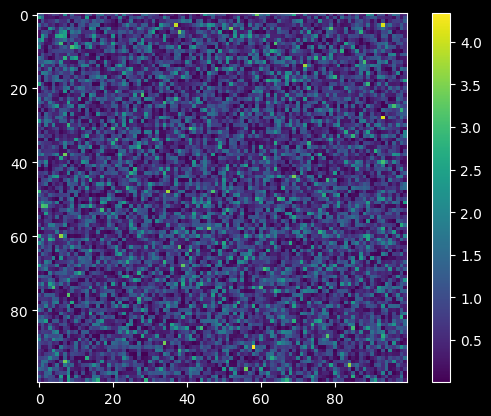

In [3]:
torch.manual_seed(0)
A = torch.randn(100, 100).abs().to(DEVICE)
plt.imshow(A)
plt.colorbar()

In [4]:
def nmf(non_negative_matrix: torch.Tensor, k=10, lr=.5, max_iters=10_000, eps=1e-12, device="cpu", norm=torch.linalg.norm):
	assert len(non_negative_matrix.shape) == 2, "Must be a matrix"
	assert torch.allclose(non_negative_matrix, non_negative_matrix.abs()), "Must be non-negative"
	assert k > 0 and int(k) == k, "k must be positive integer"

	m, n = non_negative_matrix.shape
	B = torch.randn((m, k), requires_grad=True).to(device)
	C = torch.randn((k, n), requires_grad=True).to(device)

	optim = torch.optim.AdamW([B, C], lr)
	old_loss = None

	for i in range(max_iters):
		optim.zero_grad()

		A_approx = B.abs()@C.abs()
		loss = norm(A_approx-A)

		if old_loss is None:
			old_loss = loss
		else:
			if norm(old_loss-loss) < eps: break
			old_loss = loss
		
		loss.backward()
		optim.step()

		print(i, loss.item())

	return B.detach().abs(), C.detach().abs()

torch.manual_seed(0)
B, C = nmf(A, k=2)

0 141.76156616210938
1 87.28295135498047
2 73.33296203613281
3 73.50028228759766
4 73.67212677001953
5 71.26603698730469
6 69.00473022460938
7 67.51506042480469
8 66.83355712890625
9 66.55066680908203
10 66.16939544677734
11 65.45027923583984
12 64.67467498779297
13 64.06710815429688
14 63.511009216308594
15 62.93134689331055
16 62.43693542480469
17 62.10896301269531
18 61.88569259643555
19 61.67879867553711
20 61.45087432861328
21 61.20494842529297
22 60.957794189453125
23 60.74232482910156
24 60.590755462646484
25 60.473873138427734
26 60.37788391113281
27 60.24701690673828
28 60.09954071044922
29 59.97328567504883
30 59.85755157470703
31 59.75646209716797
32 59.67796325683594
33 59.59803771972656
34 59.49760437011719
35 59.40901184082031
36 59.36149978637695
37 59.32439422607422
38 59.26198196411133
39 59.18865966796875
40 59.14779281616211
41 59.13560104370117
42 59.11966323852539
43 59.079288482666016
44 59.034549713134766
45 59.012020111083984
46 59.00867462158203
47 58.999832153

0 1208.748291015625
1 1177.8543701171875
2 1147.650146484375
3 1118.041748046875
4 1089.3013916015625
5 1061.192626953125
6 1033.74169921875
7 1006.9866333007812
8 980.85498046875
9 955.3972778320312
10 930.4580688476562
11 906.1181030273438
12 882.337890625
13 859.21044921875
14 836.575927734375
15 814.50244140625
16 792.9984741210938
17 771.9869995117188
18 751.5513305664062
19 731.6792602539062
20 712.3679809570312
21 693.5765991210938
22 675.2382202148438
23 657.3642578125
24 639.9215087890625
25 623.0228271484375
26 606.5808715820312
27 590.5798950195312
28 575.0046997070312
29 559.8395385742188
30 545.0568237304688
31 530.6751708984375
32 516.7298583984375
33 503.1289978027344
34 489.8589782714844
35 476.92236328125
36 464.3744812011719
37 452.2305908203125
38 440.43927001953125
39 429.0181884765625
40 417.8540954589844
41 407.0207824707031
42 396.5024719238281
43 386.2563781738281
44 376.3117370605469
45 366.69012451171875
46 357.3748779296875
47 348.3111267089844
48 339.515625


Text(0.5, 1.0, 'Approximate A')

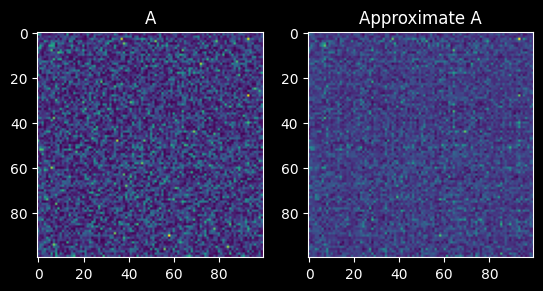

In [7]:
torch.manual_seed(0)
B, C = nmf(A, k=20, lr=1e-2, eps=1e-15)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(A)
axes[0].set_title("A")

axes[1].imshow(B@C)
axes[1].set_title("Approximate A")